# Chap3. 1차 저주파 통과 필터(First -order Low Pass Fiter)

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def get_noise_sin(offset,value):
    output = np.sin(value) + np.random.normal(0,1) + offset # 입력한 value에 대해서 0을 기준으로 표준편차 1를 가지는 가우시안 분포에서 노이즈를 가짐
    return output

In [69]:
class LPFilter:  # 객체 지향적 프로그래밍을 이용한 이동 평균 필터 구현
    def __init__(self):
        self.pre_Avg = 0
        
    def run(self,inp,alpha):
        self.pre_Avg = alpha * self.pre_Avg + (1-alpha)*inp
        return self.pre_Avg

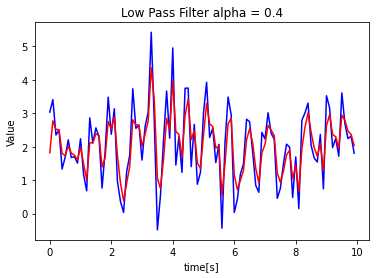

In [73]:
dt = 0.1
t = np.arange(0,10,dt) # 0에서 10초까지 dt 간격으로 데이터 생성
nSamples = np.zeros(t.shape)
alpha =  0.4

lpfilter = LPFilter() # 이동평균필터 객체 선언

AvgSaved = [] #Plot하기위한 리스트 선언

for i in range(t.shape[0]):
    
    nSamples[i] = get_noise_sin(2,i)
    
    avg=lpfilter.run(nSamples[i],alpha)
    
    AvgSaved.append(avg)

plt.title("Low Pass Filter alpha = {}".format(alpha))
plt.ylabel("Value")
plt.xlabel("time[s]")
plt.plot(t,nSamples,'blue')
plt.plot(t,AvgSaved,'red')   